In [4]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

In [5]:
data = pd.read_csv("D:\Data sets\diabetes.csv")

In [6]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
data.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [8]:
x = data.drop(['Outcome'], axis=1)
y = data.Outcome

In [9]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
model = SelectKBest(score_func= chi2, k="all")

In [12]:
value = model.fit(x,y)

In [13]:
value.scores_

array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
       2175.56527292,  127.66934333,    5.39268155,  181.30368904])

In [14]:
df = pd.DataFrame({'Col':x.columns, 'value': value.scores_})

In [15]:
df.sort_values(by='value', ascending=False)

,Col,value
4,Insulin,2175.565273
1,Glucose,1411.887041
7,Age,181.303689
5,BMI,127.669343
0,Pregnancies,111.519691
3,SkinThickness,53.108040
2,BloodPressure,17.605373
6,Pedigree,5.392682


Outlier detection

In [27]:
def rem_outlier(df,col):
    q1  = df[col].quantile(0.25)
    q3  = df[col].quantile(0.75)
    iqr = q3-q1
    
    print('IQR = ...',iqr)
    up_value  = q3 + 1.5 * ( iqr )
    low_value = q1 - 1.5 * ( iqr )

    print("upper = ",up_value,"\n","Lower=",low_value)
    
    global upper_outliers
    global lower_outliers
    global df2

    outliers = [x for x in df[col] if(x>up_value or  x<low_value)]
    
    df2 = df[col].loc[df[col].isin(outliers)]
    print(df2.shape)
    
    return outliers 

{'whiskers': [<matplotlib.lines.Line2D at 0x1979696b5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1979696bca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1979696b280>],
 'medians': [<matplotlib.lines.Line2D at 0x1979697b3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1979697b6a0>],
 'means': []}

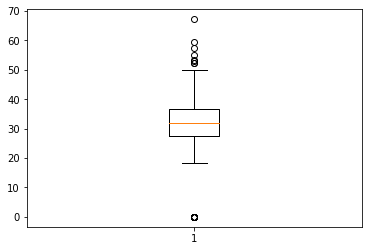

In [25]:
import matplotlib.pyplot as plt
plt.boxplot(data["BMI"])

In [28]:
ol = rem_outlier(data,'BMI')
ol

IQR = ... 9.3
upper =  50.550000000000004 
 Lower= 13.35
(19,)


[0.0,
 0.0,
 0.0,
 0.0,
 53.2,
 55.0,
 0.0,
 67.1,
 52.3,
 52.3,
 52.9,
 0.0,
 0.0,
 59.4,
 0.0,
 0.0,
 57.3,
 0.0,
 0.0]